In [12]:
import nltk
#.               Added sentence Tokenizer. Alemi 04/12/2020
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag
import pandas as pd

In [13]:
# Import python libraries

import numpy as np
import pandas as pd
import os
import re

In [14]:
# Import dependencies

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Syntax Structure


In [15]:
rNews=pd.read_csv('RedditNews.csv')
rNews.tail()

,Date,News
73603,2008-06-08,b'Man goes berzerk in Akihabara and stabs ever...
73604,2008-06-08,b'Threat of world AIDS pandemic among heterose...
73605,2008-06-08,b'Angst in Ankara: Turkey Steers into a Danger...
73606,2008-06-08,"b""UK: Identity cards 'could be used to spy on ..."
73607,2008-06-08,"b'Marriage, they said, was reduced to the stat..."


In [16]:
dateparser = lambda x:pd.datetime.strptime(x, "%Y-%m-%d")

In [17]:
dNews=pd.read_csv('Combined_News_DJIA.csv', encoding='latin-1', parse_dates = ['Date'],date_parser = dateparser)
dNews.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [18]:
ex=rNews["News"][0]

In [19]:
ex2=dNews["Top1"][0]

In [113]:
X1 = dNews.loc[:,"Top1"].values
y1 = dNews.loc[:,"Label"].values
X2 = dNews.loc[:,"Top2"].values
y2 = dNews.loc[:,"Label"].values
X3 = dNews.loc[:,"Top3"].values
y3 = dNews.loc[:,"Label"].values
X = np.concatenate((X1, X2, X3))
y = np.concatenate((y1, y2, y3))
# print(X.shape)
# print(y.shape)
print(X)

['b"Georgia \'downs two Russian warplanes\' as countries move to brink of war"'
 "b'Why wont America and Nato help us? If they wont help us now, why did we help them in Iraq?'"
 "b'Remember that adorable 9-year-old who sang at the opening ceremonies? That was fake, too.'"
 ... 'UK must accept freedom of movement to access EU Market'
 'Boris Johnson says he will not run for Tory party leadership'
 'The president of France says if Brexit won, so can Donald Trump']


In [114]:
Z=X
print(ex)

A 117-year-old woman in Mexico City finally received her birth certificate, and died a few hours later. Trinidad Alvarez Lira had waited years for proof that she had been born in 1898.


In [22]:
text = nltk.sent_tokenize(ex)
print(text)

['A 117-year-old woman in Mexico City finally received her birth certificate, and died a few hours later.', 'Trinidad Alvarez Lira had waited years for proof that she had been born in 1898.']


In [23]:
for i in nltk.sent_tokenize(ex):
    print(i)

A 117-year-old woman in Mexico City finally received her birth certificate, and died a few hours later.
Trinidad Alvarez Lira had waited years for proof that she had been born in 1898.


In [24]:
for i in nltk.word_tokenize(ex):
    print(i)

A
117-year-old
woman
in
Mexico
City
finally
received
her
birth
certificate
,
and
died
a
few
hours
later
.
Trinidad
Alvarez
Lira
had
waited
years
for
proof
that
she
had
been
born
in
1898
.


In [25]:
# Then we apply word tokenization and part-of-speech tagging to the sentence.
def preprocess(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent

In [26]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/piruzalemi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/piruzalemi/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [27]:
# We get a list of tuples containing the individual words in the sentence and their associated part-of-speech.
sent = preprocess(ex)
sent

[('A', 'DT'),
 ('117-year-old', 'JJ'),
 ('woman', 'NN'),
 ('in', 'IN'),
 ('Mexico', 'NNP'),
 ('City', 'NNP'),
 ('finally', 'RB'),
 ('received', 'VBD'),
 ('her', 'PRP'),
 ('birth', 'NN'),
 ('certificate', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('died', 'VBD'),
 ('a', 'DT'),
 ('few', 'JJ'),
 ('hours', 'NNS'),
 ('later', 'RB'),
 ('.', '.'),
 ('Trinidad', 'NNP'),
 ('Alvarez', 'NNP'),
 ('Lira', 'NNP'),
 ('had', 'VBD'),
 ('waited', 'VBN'),
 ('years', 'NNS'),
 ('for', 'IN'),
 ('proof', 'NN'),
 ('that', 'IN'),
 ('she', 'PRP'),
 ('had', 'VBD'),
 ('been', 'VBN'),
 ('born', 'VBN'),
 ('in', 'IN'),
 ('1898', 'CD'),
 ('.', '.')]

Now we’ll implement noun phrase chunking to identify named entities using a regular expression consisting of rules that indicate how sentences should be chunked.
Our chunk pattern consists of one rule, that a noun phrase, NP, should be formed whenever the chunker finds an optional determiner, DT, followed by any number of adjectives, JJ, and then a noun, NN.

In [28]:
pattern = 'NP: {<DT>?<JJ>*<NN>}'

In [29]:
cp = nltk.RegexpParser(pattern)
cs = cp.parse(sent)
print(cs)

(S
  (NP A/DT 117-year-old/JJ woman/NN)
  in/IN
  Mexico/NNP
  City/NNP
  finally/RB
  received/VBD
  her/PRP
  (NP birth/NN)
  (NP certificate/NN)
  ,/,
  and/CC
  died/VBD
  a/DT
  few/JJ
  hours/NNS
  later/RB
  ./.
  Trinidad/NNP
  Alvarez/NNP
  Lira/NNP
  had/VBD
  waited/VBN
  years/NNS
  for/IN
  (NP proof/NN)
  that/IN
  she/PRP
  had/VBD
  been/VBN
  born/VBN
  in/IN
  1898/CD
  ./.)


# Chunker

The output can be read as a tree or a hierarchy with S as the first level, denoting sentence. we can also display it graphically.

# 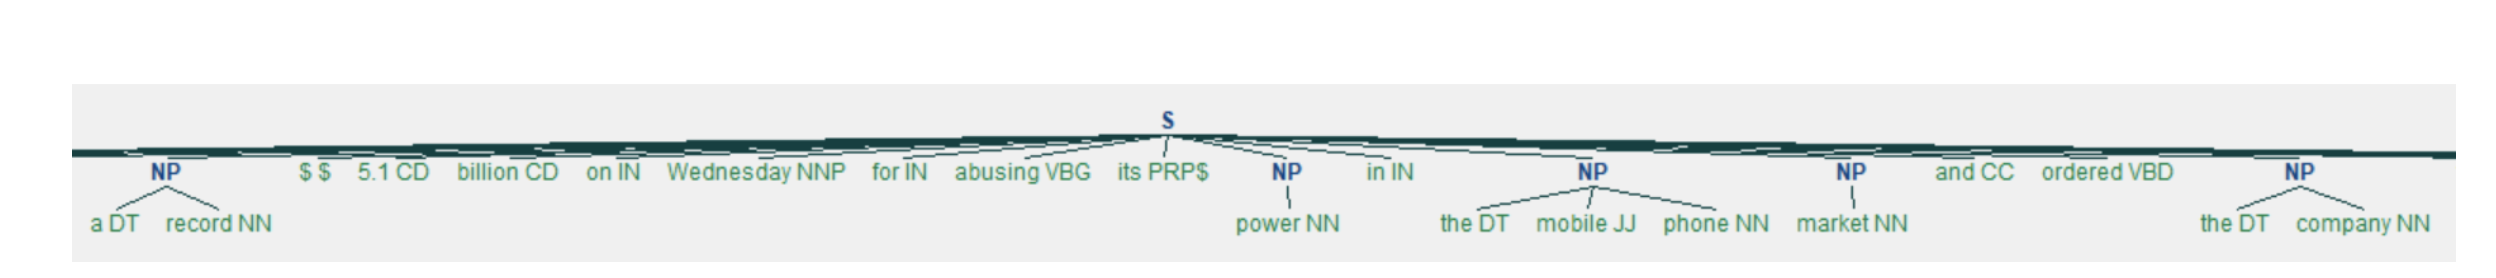

In [30]:
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint
iob_tagged = tree2conlltags(cs)
pprint(iob_tagged)

[('A', 'DT', 'B-NP'),
 ('117-year-old', 'JJ', 'I-NP'),
 ('woman', 'NN', 'I-NP'),
 ('in', 'IN', 'O'),
 ('Mexico', 'NNP', 'O'),
 ('City', 'NNP', 'O'),
 ('finally', 'RB', 'O'),
 ('received', 'VBD', 'O'),
 ('her', 'PRP', 'O'),
 ('birth', 'NN', 'B-NP'),
 ('certificate', 'NN', 'B-NP'),
 (',', ',', 'O'),
 ('and', 'CC', 'O'),
 ('died', 'VBD', 'O'),
 ('a', 'DT', 'O'),
 ('few', 'JJ', 'O'),
 ('hours', 'NNS', 'O'),
 ('later', 'RB', 'O'),
 ('.', '.', 'O'),
 ('Trinidad', 'NNP', 'O'),
 ('Alvarez', 'NNP', 'O'),
 ('Lira', 'NNP', 'O'),
 ('had', 'VBD', 'O'),
 ('waited', 'VBN', 'O'),
 ('years', 'NNS', 'O'),
 ('for', 'IN', 'O'),
 ('proof', 'NN', 'B-NP'),
 ('that', 'IN', 'O'),
 ('she', 'PRP', 'O'),
 ('had', 'VBD', 'O'),
 ('been', 'VBN', 'O'),
 ('born', 'VBN', 'O'),
 ('in', 'IN', 'O'),
 ('1898', 'CD', 'O'),
 ('.', '.', 'O')]




In this representation, there is one token per line, each with its part-of-speech tag and its named entity tag. Based on this training corpus, we can construct a tagger that can be used to label new sentences; and use the nltk.chunk.conlltags2tree() function to convert the tag sequences into a chunk tree.

With the function nltk.ne_chunk(), we can recognize named entities using a classifier, the classifier adds category labels such as PERSON, ORGANIZATION, and GPE.

In [31]:
from nltk.chunk import conlltags2tree, tree2conlltags, ne_chunk
from pprint import pprint

In [32]:
import nltk
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/piruzalemi/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/piruzalemi/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [33]:

ne_tree = ne_chunk(pos_tag(word_tokenize(ex)))
print(ne_tree)

(S
  A/DT
  117-year-old/JJ
  woman/NN
  in/IN
  (GPE Mexico/NNP City/NNP)
  finally/RB
  received/VBD
  her/PRP
  birth/NN
  certificate/NN
  ,/,
  and/CC
  died/VBD
  a/DT
  few/JJ
  hours/NNS
  later/RB
  ./.
  (PERSON Trinidad/NNP Alvarez/NNP Lira/NNP)
  had/VBD
  waited/VBN
  years/NNS
  for/IN
  proof/NN
  that/IN
  she/PRP
  had/VBD
  been/VBN
  born/VBN
  in/IN
  1898/CD
  ./.)


In [34]:
# I thank Susan Li Senior Data Sicentist in Canada for her git hub code adapted to our data set...Please add
# to the rest, looping thru our documents and chuncking on S&P500 code!  Alemi. 04/09/2020 

In [35]:
import nltk
nltk.download('treebank')

[nltk_data] Downloading package treebank to
[nltk_data]     /Users/piruzalemi/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


True

In [36]:
from nltk.corpus import treebank
#. Do noty run this.........
#t = treebank.parsed_sents('wsj_0001.mrg')[0]
#t.draw()

## Latent Dirichlet Allocation
### Assign Topics to unlabelled text dopcuments

In [37]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Note we set the maximum document frequency to be considered to 10%, to exclude words that occur 
#. too frequently across documents.
#
# The rational behind the removal of frequency occuring word  is that these might be common words occuring across
# all documents. Also we limit the the number of words to be considered, to the most frequently occuring 200 words
# max_features=200
count2 = CountVectorizer(stop_words='english', max_df=0.1,max_features=200)

In [39]:
from sklearn.decomposition import LatentDirichletAllocation

In [123]:
#X=count2.fit_transform(dNews['Top1'].values)
X=count2.fit_transform(X)

In [124]:
# n_topics did not work and i changed it to n_components
# lda is our model!
lda = LatentDirichletAllocation(n_components=10, random_state=123,learning_method='batch')

In [125]:
# Print the Model:
# Build LDA Model
#lda_model = LatentDirichletAllocation(n_components=20,               # Number of topics
#                                      max_iter=10,               
# Max learning iterations
#                                      learning_method='online',   
#                                      random_state=100,          
# Random state
#                                      batch_size=128,            
# n docs in each learning iter
#                                      evaluate_every = -1,       
# compute perplexity every n iters, default: Don't
#                                      n_jobs = -1,               
# Use all available CPUs


print(lda)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=123, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)


In [126]:
# X    was vectorized
X_topics=lda.fit_transform(X)

In [127]:
lda_output = lda.fit_transform(X)

In [128]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda.score(X))

Log Likelihood:  -95912.04113658932


In [129]:
#7 Diagnose model performance with perplexity and log-likelihood
# A model with higher log-likelihood and lower perplexity (exp(-1. * log-likelihood per word))
# is considered to be good.

In [130]:
# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda.perplexity(X))

Perplexity:  225.66814792477965


In [131]:
# See models parameters
pprint(lda.get_params())

{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'batch',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 10,
 'n_jobs': None,
 'perp_tol': 0.1,
 'random_state': 123,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


In [132]:
#print(lda_model)
print(X_topics)

[[0.025      0.025      0.025      ... 0.025      0.025      0.49702029]
 [0.02       0.21999981 0.6199939  ... 0.02       0.02       0.02      ]
 [0.03333333 0.03333333 0.03333333 ... 0.03333333 0.03333333 0.03333333]
 ...
 [0.03333333 0.03333333 0.03333333 ... 0.50594923 0.03333333 0.2273841 ]
 [0.03333333 0.03333333 0.03333333 ... 0.03333416 0.03333333 0.03333438]
 [0.025      0.025      0.27499994 ... 0.025      0.025      0.02500001]]


### On a different note, perplexity might not be the best measure to evaluate topic models because 
### it doesn’t consider the context and semantic associations between words.

In [219]:
# Create Document — Topic Matrix
X=data_vectorized
lda_output = lda.transform(data_vectorized)
print(lda_output)
lda_output.shape

[[0.0333334  0.03333334 0.03333708 ... 0.03333333 0.23350039 0.49982546]
 [0.02000055 0.02       0.02000015 ... 0.02       0.81999918 0.02      ]
 [0.03333333 0.03333957 0.03333333 ... 0.36666018 0.03333333 0.03333333]
 ...
 [0.1        0.1        0.1        ... 0.1        0.1        0.1       ]
 [0.02000248 0.02000111 0.21999627 ... 0.02000275 0.02       0.41213626]
 [0.01111168 0.27798775 0.01111111 ... 0.32967967 0.01111163 0.01111402]]


(1989, 10)

In [222]:

# column names
topicnames = ["Topic" + str(i) for i in range(lda.n_components)]
# index names
#docnames = [“Doc” + str(i) for i in range(len(data))]
# Make the pandas dataframe
#df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)
print(lda.n_components)
#topicnames.shape

10


In [221]:
#X
#print(data_vectorized)

In [148]:
# index names
data=Z
docnames = ["Doc" + str(i) for i in range(len(data))]
print(docnames)


['Doc0', 'Doc1', 'Doc2', 'Doc3', 'Doc4', 'Doc5', 'Doc6', 'Doc7', 'Doc8', 'Doc9', 'Doc10', 'Doc11', 'Doc12', 'Doc13', 'Doc14', 'Doc15', 'Doc16', 'Doc17', 'Doc18', 'Doc19', 'Doc20', 'Doc21', 'Doc22', 'Doc23', 'Doc24', 'Doc25', 'Doc26', 'Doc27', 'Doc28', 'Doc29', 'Doc30', 'Doc31', 'Doc32', 'Doc33', 'Doc34', 'Doc35', 'Doc36', 'Doc37', 'Doc38', 'Doc39', 'Doc40', 'Doc41', 'Doc42', 'Doc43', 'Doc44', 'Doc45', 'Doc46', 'Doc47', 'Doc48', 'Doc49', 'Doc50', 'Doc51', 'Doc52', 'Doc53', 'Doc54', 'Doc55', 'Doc56', 'Doc57', 'Doc58', 'Doc59', 'Doc60', 'Doc61', 'Doc62', 'Doc63', 'Doc64', 'Doc65', 'Doc66', 'Doc67', 'Doc68', 'Doc69', 'Doc70', 'Doc71', 'Doc72', 'Doc73', 'Doc74', 'Doc75', 'Doc76', 'Doc77', 'Doc78', 'Doc79', 'Doc80', 'Doc81', 'Doc82', 'Doc83', 'Doc84', 'Doc85', 'Doc86', 'Doc87', 'Doc88', 'Doc89', 'Doc90', 'Doc91', 'Doc92', 'Doc93', 'Doc94', 'Doc95', 'Doc96', 'Doc97', 'Doc98', 'Doc99', 'Doc100', 'Doc101', 'Doc102', 'Doc103', 'Doc104', 'Doc105', 'Doc106', 'Doc107', 'Doc108', 'Doc109', 'Doc110',

AttributeError: 'list' object has no attribute 'shape'

In [150]:
len(docnames)

5967

In [137]:
lda.components_.shape

(10, 200)

In [152]:
# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames)
df_document_topic

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9
0,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.23,0.50
1,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.82,0.02
2,0.03,0.03,0.03,0.37,0.03,0.03,0.03,0.37,0.03,0.03
3,0.02,0.20,0.18,0.02,0.02,0.02,0.02,0.02,0.50,0.02
4,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.55
...,...,...,...,...,...,...,...,...,...,...
1984,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10
1985,0.27,0.28,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.27
1986,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10
1987,0.02,0.02,0.22,0.02,0.23,0.02,0.02,0.02,0.02,0.41


In [139]:
#lda.components_[5]

In [140]:
n_top_words = 10

In [153]:
feature_names = count2.get_feature_names()
#feature_names

In [154]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(lda.components_)

In [156]:
# Assign Column and Index
#df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.columns = feature_names
df_topic_keywords.index = topicnames

In [157]:
# View
df_topic_keywords.head()
   

,000,10,100,20,50,abuse,afghanistan,al,american,amp,...,way,west,wikileaks,woman,women,workers,world,year,years,young
Topic0,0.100005,3.767684,0.100011,32.691167,0.100004,0.100006,0.100002,0.100002,0.100008,99.668849,...,0.100015,1.619081,0.100005,0.100004,0.100006,0.131482,0.100007,0.100004,10.195544,0.100005
Topic1,13.313469,66.432256,48.095487,0.100014,0.100019,0.100008,0.409978,12.788871,0.100006,0.100005,...,0.100013,0.100010,0.100004,8.221071,0.100008,0.100016,0.100006,0.100007,161.450487,0.100004
Topic2,0.100015,0.100005,0.100007,0.108096,5.524970,0.100003,0.100005,0.100007,0.100006,0.338594,...,4.032551,8.521906,0.100004,0.119136,0.100031,7.205586,0.100602,0.100004,0.100010,10.728998
Topic3,0.100007,0.100008,0.100009,0.100010,3.602677,39.280720,51.789947,0.100006,0.100007,0.106602,...,33.000217,0.100006,0.100004,0.100062,0.100007,27.930539,0.100006,239.099952,0.100013,0.100016
Topic4,0.100005,0.100005,0.100005,0.100002,0.100012,0.100003,0.100021,0.100006,22.180190,0.100004,...,0.100023,0.100009,126.099961,0.100004,0.100003,0.100007,0.100008,0.100003,0.100082,0.100003


In [172]:
count2.get_feature_names()

['000',
 '10',
 '100',
 '20',
 '50',
 'abuse',
 'afghanistan',
 'al',
 'american',
 'amp',
 'anti',
 'arabia',
 'army',
 'arrest',
 'arrested',
 'assange',
 'attack',
 'australia',
 'australian',
 'away',
 'ban',
 'bank',
 'banned',
 'bans',
 'bbc',
 'big',
 'biggest',
 'billion',
 'brazil',
 'britain',
 'british',
 'calls',
 'canada',
 'canadian',
 'change',
 'child',
 'children',
 'china',
 'chinese',
 'church',
 'city',
 'company',
 'countries',
 'country',
 'court',
 'day',
 'days',
 'dead',
 'death',
 'documents',
 'drug',
 'drugs',
 'egypt',
 'end',
 'eu',
 'europe',
 'european',
 'face',
 'family',
 'food',
 'forces',
 'foreign',
 'france',
 'free',
 'french',
 'gay',
 'gaza',
 'german',
 'germany',
 'girl',
 'global',
 'going',
 'google',
 'government',
 'group',
 'help',
 'history',
 'home',
 'hours',
 'human',
 'illegal',
 'including',
 'india',
 'international',
 'internet',
 'iran',
 'iraq',
 'isis',
 'islamic',
 'israel',
 'israeli',
 'jail',
 'japan',
 'just',
 'kill',
 '

## Get the top 15 keywords each topic:

In [176]:
# Show top n keywords for each topic
def show_topics(vectorizer, lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords
# Note count2 is my LDA count vectorizer ---------------------------------------Piruz Alemi 04/14/2020
topic_keywords = show_topics(count2, lda, n_words=15)
# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,human,rights,amp,calls,use,stop,south,marijuana,bbc,korean,europe,group,prison,20,news
Topic 1,years,china,death,international,news,arrested,days,iraq,gay,10,sex,life,jail,canadian,men
Topic 2,new,people,court,law,france,australia,water,muslim,country,french,rules,live,biggest,foreign,help
Topic 3,says,year,old,minister,oil,girl,child,australian,prime,afghanistan,shot,day,britain,official,abuse
Topic 4,president,wikileaks,iran,british,snowden,internet,right,nsa,european,pirate,party,say,said,protesters,secret
Topic 5,government,israel,state,just,gaza,israeli,protest,palestinian,bank,global,google,army,anti,make,syria
Topic 6,world,korea,north,germany,power,united,attack,states,largest,countries,china,change,south,history,war
Topic 7,000,uk,million,canada,drug,ban,billion,mexico,city,illegal,people,al,london,national,pakistan
Topic 8,police,killed,women,saudi,man,woman,isis,israeli,german,american,public,home,arabia,family,video
Topic 9,war,russia,russian,dead,chinese,time,india,children,free,japan,money,putin,ukraine,nuclear,end


In [ ]:
# At this step, we need to infer topics according to their key words. 
# For example: For topic 2, news is about "court","muslim", "rules", "France" etc.
# we conclude that this topic is about “French Rules”.
# Topic 1: Human Rights
# Topic 2 : International Sex, etc.

In [184]:
Topics = ["human rights/prison","international sex","French Rules","Oil abuse","Iran British","Palestine/Israel protest", 
          "war history", "drug mexico", "isis saudi/women killed", "russia chinese putin"]
df_topic_keywords["Topics"]=Topics
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Topics
Topic 0,human,rights,amp,calls,use,stop,south,marijuana,bbc,korean,europe,group,prison,20,news,human rights/prison
Topic 1,years,china,death,international,news,arrested,days,iraq,gay,10,sex,life,jail,canadian,men,international sex
Topic 2,new,people,court,law,france,australia,water,muslim,country,french,rules,live,biggest,foreign,help,French Rules
Topic 3,says,year,old,minister,oil,girl,child,australian,prime,afghanistan,shot,day,britain,official,abuse,Oil abuse
Topic 4,president,wikileaks,iran,british,snowden,internet,right,nsa,european,pirate,party,say,said,protesters,secret,Iran British
Topic 5,government,israel,state,just,gaza,israeli,protest,palestinian,bank,global,google,army,anti,make,syria,Palestine/Israel protest
Topic 6,world,korea,north,germany,power,united,attack,states,largest,countries,china,change,south,history,war,war history
Topic 7,000,uk,million,canada,drug,ban,billion,mexico,city,illegal,people,al,london,national,pakistan,drug mexico
Topic 8,police,killed,women,saudi,man,woman,isis,israeli,german,american,public,home,arabia,family,video,isis saudi/women killed
Topic 9,war,russia,russian,dead,chinese,time,india,children,free,japan,money,putin,ukraine,nuclear,end,russia chinese putin


In [185]:
Topics = ["human rights/prison","international sex","court muslim","Iran British","Palestine/Israel protest", 
          "war history", "drug mexico", "isis saudi/women killed", "russia chinese putin", "Photo/Search"]
df_topic_keywords["Topics"]=Topics
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Topics
Topic 0,human,rights,amp,calls,use,stop,south,marijuana,bbc,korean,europe,group,prison,20,news,human rights/prison
Topic 1,years,china,death,international,news,arrested,days,iraq,gay,10,sex,life,jail,canadian,men,international sex
Topic 2,new,people,court,law,france,australia,water,muslim,country,french,rules,live,biggest,foreign,help,court muslim
Topic 3,says,year,old,minister,oil,girl,child,australian,prime,afghanistan,shot,day,britain,official,abuse,Iran British
Topic 4,president,wikileaks,iran,british,snowden,internet,right,nsa,european,pirate,party,say,said,protesters,secret,Palestine/Israel protest
Topic 5,government,israel,state,just,gaza,israeli,protest,palestinian,bank,global,google,army,anti,make,syria,war history
Topic 6,world,korea,north,germany,power,united,attack,states,largest,countries,china,change,south,history,war,drug mexico
Topic 7,000,uk,million,canada,drug,ban,billion,mexico,city,illegal,people,al,london,national,pakistan,isis saudi/women killed
Topic 8,police,killed,women,saudi,man,woman,isis,israeli,german,american,public,home,arabia,family,video,russia chinese putin
Topic 9,war,russia,russian,dead,chinese,time,india,children,free,japan,money,putin,ukraine,nuclear,end,Photo/Search


In [195]:
# Run in terminal or command prompt
#python3 -m spacy download en
#!conda install -c conda-forge spacy
!pip install -U spacy

     |████████████████████████████████| 10.5MB 9.7MB/s eta 0:00:01
     |████████████████████████████████| 215kB 19.1MB/s eta 0:00:01
     |████████████████████████████████| 2.2MB 14.4MB/s eta 0:00:01
     |████████████████████████████████| 4.0MB 19.8MB/s eta 0:00:01
     |████████████████████████████████| 61kB 15.6MB/s eta 0:00:01
     |████████████████████████████████| 184kB 26.2MB/s eta 0:00:01
     |████████████████████████████████| 61kB 20.2MB/s eta 0:00:01
  Found existing installation: tqdm 4.36.1
    Uninstalling tqdm-4.36.1:
      Successfully uninstalled tqdm-4.36.1


In [197]:
!pip install gensim

     |████████████████████████████████| 23.7MB 1.7MB/s eta 0:00:01
     |████████████████████████████████| 112kB 21.1MB/s eta 0:00:01
     |████████████████████████████████| 133kB 41.3MB/s eta 0:00:01
     |████████████████████████████████| 71kB 17.3MB/s eta 0:00:01
     |████████████████████████████████| 6.1MB 39.4MB/s eta 0:00:01
  Created wheel for smart-open: filename=smart_open-1.11.1-cp37-none-any.whl size=95257 sha256=0dae124a2fd676d90ea8f81ab2adecb89ebdf272f810db06b7c7bd6ee1dc74dc
  Stored in directory: /Users/piruzalemi/Library/Caches/pip/wheels/51/88/6c/2bcd305b87c1e62cbcbf419e782ad9fc612cd4bbb71557502d
Successfully built smart-open


In [200]:
#!conda install -c memex pyldavis
!python -m pip install -U pyLDAvis

     |████████████████████████████████| 1.6MB 1.7MB/s eta 0:00:01
     |████████████████████████████████| 552kB 43.1MB/s eta 0:00:01
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=eecd2f426e7c3ba2e089786a6fa2ea927fbd1bd8d380725e0b39937f4504a38f
  Stored in directory: /Users/piruzalemi/Library/Caches/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32040 sha256=be1a9e7ff4e09df38b4ff74339345efb77663573c41c5f54546adb6ff9ef3c5e
  Stored in directory: /Users/piruzalemi/Library/Caches/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [201]:
# Run in terminal or command prompt
#python3 -m spacy download en
import numpy as np
import pandas as pd
import re, nltk, spacy, gensim
# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [206]:
!pip install --upgrade pip

     |████████████████████████████████| 1.4MB 2.1MB/s eta 0:00:01
  Found existing installation: pip 19.2.3
    Uninstalling pip-19.2.3:
      Successfully uninstalled pip-19.2.3


In [209]:
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

     |████████████████████████████████| 12.0 MB 1.7 MB/s eta 0:00:01
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.0-py3-none-any.whl size=12019122 sha256=07a9fd6b090a6a36f7b62d7ac935b659aa3bd1bf3bf88f20dc259d79ee53195a
  Stored in directory: /Users/piruzalemi/Library/Caches/pip/wheels/64/69/41/6f820cf1d7488a0381a2059f66ec9f8f23116f7c67d18f3d8d
Successfully built en-core-web-sm


In [210]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [212]:
!python -m spacy download en

     |████████████████████████████████| 12.0 MB 1.8 MB/s eta 0:00:01
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.5-py3-none-any.whl size=12011738 sha256=f9ccdaacd3943d7159e06ed470f846da8a6ea6b915a83f17e5071064a96257fb
  Stored in directory: /private/var/folders/cp/fdjy78811p514g86b2vjfy300000gn/T/pip-ephem-wheel-cache-ec1b98fu/wheels/51/19/da/a3885266a3c241aff0ad2eb674ae058fd34a4870fef1c0a5a0
Successfully built en-core-web-sm
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.0
    Uninstalling en-core-web-sm-2.2.0:
      Successfully uninstalled en-core-web-sm-2.2.0
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/Users/piruzalemi/opt/anaconda3/lib/python3.7/site-packages/en_core_web_sm -->
/Users/piruzalemi/opt/anaconda3/lib/python3.7/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [213]:
# Define function to predict topic for a given text document.
nlp = spacy.load('en', disable=['parser', 'ner'])

In [214]:
def predict_topic(text, nlp=nlp):
    global sent_to_words
    global lemmatization

In [225]:
# Construct the k-means clusters
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=15, random_state=100).fit_predict(lda_output)

In [227]:
# Build the Singular Value Decomposition(SVD) model
svd_model = TruncatedSVD(n_components=2)  # 2 components
lda_output_svd = svd_model.fit_transform(lda_output)

In [228]:
# X and Y axes of the plot using SVD decomposition
x = lda_output_svd[:, 0]
y = lda_output_svd[:, 1]

In [229]:
# Weights for the 15 columns of lda_output, for each component
print("Component's weights: \n", np.round(svd_model.components_, 2))

Component's weights: 
 [[ 0.22  0.31  0.32  0.34  0.41  0.28  0.29  0.28  0.35  0.32]
 [ 0.03 -0.2  -0.14 -0.2   0.89 -0.06 -0.07 -0.16 -0.28 -0.02]]


In [230]:
# Percentage of total information in 'lda_output' explained by the two components
print("Perc of Variance Explained: \n", np.round(svd_model.explained_variance_ratio_, 2))

Perc of Variance Explained: 
 [0.   0.15]


Text(0.5, 1.0, 'Segregation of Topic Clusters')

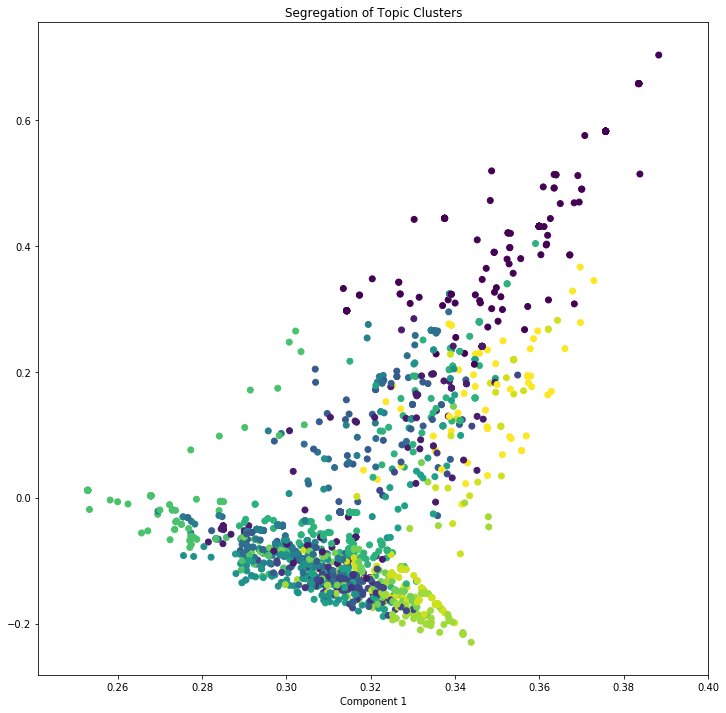

In [232]:
# Plot
plt.figure(figsize=(12, 12))
plt.scatter(x, y, c=clusters)
plt.xlabel('Component 2')
plt.xlabel('Component 1')
plt.title("Segregation of Topic Clusters", )

In [233]:
# Step 1: Clean with simple_preprocess
#mytext_2 = list(sent_to_words(text))

In [236]:
#.  Note the index = 15 for Topic #16 (Alemi)
Topic10 =X_topics[:, 9].argsort()[::-1]

In [235]:
# Based on the most importantyv words for each topic, we may guess that Latent Dirichlet Allocation (LDA)
# puts them in the above 20 topics. I here print  say Topic 9 from our original News to see the similarities ion say
# Topic 9.                                                  Piruz Alemi 04/11/2020
# 
for iter_idx,piruz_idx in enumerate(Topic10[:5]):
    print('\nTopic10 material #%d' % (iter_idx + 1))
    print(dNews['Top1'][piruz_idx][:300], '...')


Topic10 material #1


KeyError: 5277

# Sources:
#### We thank Ju chen who origianlly found & noted the code on Chunker, given our question on NLTK 
### The Latent Deriolicht is our adpatation from Sebastian Rascha & Vahid Mirjajli - Python ML
#### 
####                                             Piruz Alemi 04/09/2020 + Team = Li Steve, Zhongping Yang, Mike Fonseca
